## LEAD SCORING CASE STUDY :
#### Identification of Hot Leads to focus more on them and thus enhancing the conversion ratio

### Business Objective

#### We are required to categorize or cluster the leads as hot leads and cold leads. This is to be done by analysing past data provided by X Education Company. The Company's employee will then focus on communicating effictively with the hot leads so that most of them actually convert. We have been given a target of 80% convertion rate, and thus, in order to achieve that, we must accurately categorize the leads.

### Loading Libraries :

In [65]:
# Importing Libraries & Files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.metrics import precision_score, recall_score, precision_recall_curve
from sklearn import metrics


In [66]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Setting Pandas option
pd.set_option('display.max_columns',200)
pd.set_option('display.max_colwidth',255)
pd.set_option('display.max_info_columns',200)
pd.set_option('display.max_info_rows',200)
pd.set_option('display.width',200)
pd.set_option('display.html.border',1)

In [8]:
df_data  = pd.read_csv("C:/Users/Akshay/OneDrive/Desktop/EPGPDS/Course_2_ML/Lead Scoring Assignment/Leads.csv")
df_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [9]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [10]:
df_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [11]:
df_data.shape

(9240, 37)

In [12]:
# Percentage of null values per column
round(100*(df_data.isnull().sum()/len(df_data.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

### Data Cleaning of Columns:

In [19]:
# Dropping duplicate rows
df_data=df_data.drop_duplicates()

In [20]:
# Replacing the value 'Select' with 'NaN'
df_data = df_data.replace('Select', np.nan)
round(100*(df_data.isnull().sum()/len(df_data.index)),2)

Lead Origin                                       0.00
Lead Source                                       0.41
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.72
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.72
Last Activity                                     1.29
Country                                          14.83
Specialization                                   27.52
How did you hear about X Education               75.00
What is your current occupation                  24.51
What matters most to you in choosing a course    24.75
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [21]:
# Making list of un-usable columns, due to most NaN value (Taking value > 20 %)
unnecessary_column = set((pd.isnull(df_data).sum()/len(df_data.index) > .2).index)

# Making list of un-necessary columns from Analysis point of view
unnecessary_column = {'Prospect ID', 'Lead Number'}

# Making list of numerical columns from Analysis point of view
numerical_column = {'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'}

# Making list of categorical columns from Analysis point of view
categorical_column = {'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
                      'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
                      'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity'}

# Making list of Target/Output column from Analysis point of view
target_column = {'Converted'}

In [23]:
# Dropping un-usable and un-necessary columns
df_data = df_data[list(numerical_column | categorical_column | target_column)]

# Getting % of NaN values in new Dataframe

round(100*(df_data.isnull().sum()/len(df_data.index)),2)

Search                                      0.00
Magazine                                    0.00
Receive More Updates About Our Courses      0.00
Newspaper                                   0.00
A free copy of Mastering The Interview      0.00
Through Recommendations                     0.00
Do Not Call                                 0.00
Digital Advertisement                       0.00
Last Activity                               1.29
Lead Source                                 0.41
Page Views Per Visit                        1.72
Get updates on DM Content                   0.00
Converted                                   0.00
Do Not Email                                0.00
X Education Forums                          0.00
I agree to pay the amount through cheque    0.00
TotalVisits                                 1.72
Lead Origin                                 0.00
Last Notable Activity                       0.00
Total Time Spent on Website                 0.00
Update me on Supply 

In [24]:
# removing the columns which have very less variation in data
df_data[list(categorical_column)].describe()

,Search,Magazine,Receive More Updates About Our Courses,Newspaper,A free copy of Mastering The Interview,Do Not Call,Digital Advertisement,Last Activity,Lead Source,Get updates on DM Content,Last Notable Activity,Do Not Email,X Education Forums,I agree to pay the amount through cheque,Lead Origin,Through Recommendations,Update me on Supply Chain Content,Newspaper Article
count,7959,7959,7959,7959,7959,7959,7959,7856,7926,7959,7959,7959,7959,7959,7959,7959,7959,7959
unique,2,1,1,2,2,2,2,17,21,1,16,2,2,1,5,2,1,2
top,No,No,No,No,No,No,No,Email Opened,Google,No,Modified,No,No,No,Landing Page Submission,No,No,No
freq,7945,7959,7959,7958,5071,7957,7955,3043,2868,7959,2847,7263,7958,7959,4886,7952,7959,7957


In [25]:
# Adding columns with negligible or no variation to unnecessary_column and removing from Dataframe 
# since they would not serve any purpose for our analysis


# 'Receive More Updates About Our Courses' since all rows have same value, i.e. 'No'
unnecessary_column.add('Receive More Updates About Our Courses')
categorical_column.remove('Receive More Updates About Our Courses')

# 'Newspaper' since almost all rows have same value, i.e. 'No'
unnecessary_column.add('Newspaper')
categorical_column.remove('Newspaper')

# since almost all rows have same value, i.e. 'No'
unnecessary_column.add('Through Recommendations')
categorical_column.remove('Through Recommendations')

# 'Search' since almost all rows have same value, i.e. 'No'
unnecessary_column.add('Search')
categorical_column.remove('Search')

# since almost all rows have same value, i.e. 'No'
unnecessary_column.add('Do Not Call')
categorical_column.remove('Do Not Call')

# since all rows have same value, i.e. 'No'
unnecessary_column.add('Get updates on DM Content')
categorical_column.remove('Get updates on DM Content')

# since almost all rows have same value, i.e. 'No'
unnecessary_column.add('Newspaper Article')
categorical_column.remove('Newspaper Article')

# since all rows have same value, i.e. 'No'
unnecessary_column.add('Magazine')
categorical_column.remove('Magazine')

# since almost all rows have same value, i.e. 'No'
unnecessary_column.add('X Education Forums')
categorical_column.remove('X Education Forums')

# since all rows have same value, i.e. 'No'
unnecessary_column.add('I agree to pay the amount through cheque')
categorical_column.remove('I agree to pay the amount through cheque')

# since all rows have same value, i.e. 'No'
unnecessary_column.add('Update me on Supply Chain Content')
categorical_column.remove('Update me on Supply Chain Content')

#since almost all rows have same value, i.e. 'No'
unnecessary_column.add('Digital Advertisement')
categorical_column.remove('Digital Advertisement')


# Dropping un-usable and un-necessary columns
df_data = df_data[list(numerical_column | categorical_column | target_column)]

# Getting % of NaN values in new Dataframe

round(100*(df_data.isnull().sum()/len(df_data.index)),2)

Last Activity                             1.29
Lead Source                               0.41
Page Views Per Visit                      1.72
Converted                                 0.00
Do Not Email                              0.00
TotalVisits                               1.72
A free copy of Mastering The Interview    0.00
Lead Origin                               0.00
Last Notable Activity                     0.00
Total Time Spent on Website               0.00
dtype: float64

### Data Cleaning of Rows:

In [26]:
# Dropping rows with most NaN value (Taking value >20 %)
threshold = int(.2*len(df_data.columns))
df_data.dropna(thresh=2, inplace=True)

In [28]:
# Getting % of NaN values in new Dataframe

round(100*(df_data.isnull().sum()/len(df_data.index)),3)
     

Last Activity                             1.294
Lead Source                               0.415
Page Views Per Visit                      1.721
Converted                                 0.000
Do Not Email                              0.000
TotalVisits                               1.721
A free copy of Mastering The Interview    0.000
Lead Origin                               0.000
Last Notable Activity                     0.000
Total Time Spent on Website               0.000
dtype: float64

In [29]:
# Observing Categorical Columns
df_data[list(categorical_column)].describe()

,A free copy of Mastering The Interview,Last Activity,Lead Source,Last Notable Activity,Do Not Email,Lead Origin
count,7959,7856,7926,7959,7959,7959
unique,2,17,21,16,2,5
top,No,Email Opened,Google,Modified,No,Landing Page Submission
freq,5071,3043,2868,2847,7263,4886


In [30]:
# 'Last Activity' have 1.294 % 'NaN' values

# Replacing 'NaN' with 'Email Opened'

df_data[['Last Activity']]=df_data[['Last Activity']].fillna(value='Email Opened')

# 'Lead Source' have 0.415 % 'NaN' values

# Replacing 'NaN' with 'Google'

df_data[['Lead Source']]=df_data[['Lead Source']].fillna(value='Google')

In [31]:
# Observing Numeric Columns
df_data[list(numerical_column)].describe()
     

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,7822.000000,7959.000000,7822.000000
mean,4.009460,566.193240,2.749776
std,5.016726,551.563569,2.091107
min,0.000000,0.000000,0.000000
25%,2.000000,102.000000,1.500000
50%,3.000000,332.000000,2.000000
75%,5.000000,1042.500000,4.000000
max,251.000000,2272.000000,55.000000


In [32]:
# Imputing 'Page Views Per Visit','TotalVisits' with Mean, since the amount of missing data is less (< 2%)
# and variation in data is low.
df_data[['Page Views Per Visit']]=df_data[['Page Views Per Visit']].fillna(value=df_data[['Page Views Per Visit']].mean())
df_data[['TotalVisits']]=df_data[['TotalVisits']].fillna(value=df_data[['TotalVisits']].mean())

In [33]:
# Getting % of NaN values in new Dataframe

round(100*(df_data.isnull().sum()/len(df_data.index)),3)

Last Activity                             0.0
Lead Source                               0.0
Page Views Per Visit                      0.0
Converted                                 0.0
Do Not Email                              0.0
TotalVisits                               0.0
A free copy of Mastering The Interview    0.0
Lead Origin                               0.0
Last Notable Activity                     0.0
Total Time Spent on Website               0.0
dtype: float64

### Exploratory Data Analyisis :

In [35]:
def num_col_univariate_analysis(c):
  plt.figure(figsize=(4, 4))
  ax = sns.boxplot(y=c, data=df_data)
  plt.show()

In [36]:
def cat_col_univariate_analysis(c):
  sns.catplot(y=c, data=df_data, kind="count")
  plt.show()

In [37]:
def num_col_bivariate_analysis(c1,c2):
  plt.figure(figsize=(4, 4))
  ax = sns.boxplot(x=c1, y=c2, data=df_data)
  plt.show()

In [38]:
def cat_col_bivariate_analysis(c1,c2):
  sns.catplot(col=c1 ,y=c2, data=df_data, kind="count")
  plt.show()

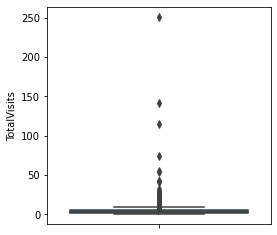

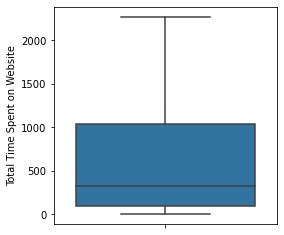

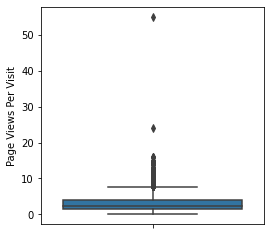

In [39]:
# Univariate Analysis of Numerical Columns
for c in numerical_column:
  num_col_univariate_analysis(c)
     

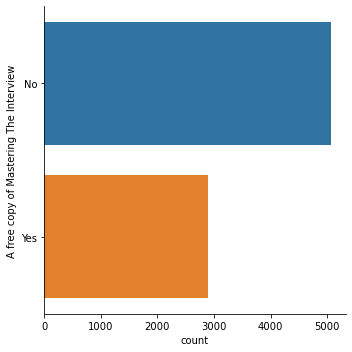

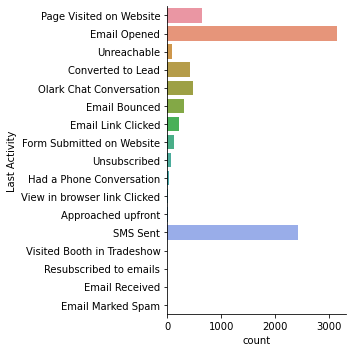

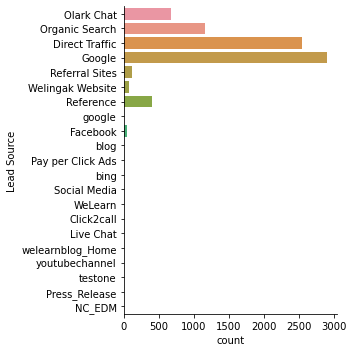

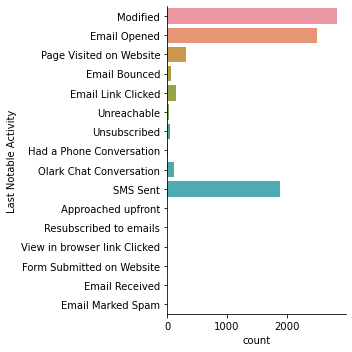

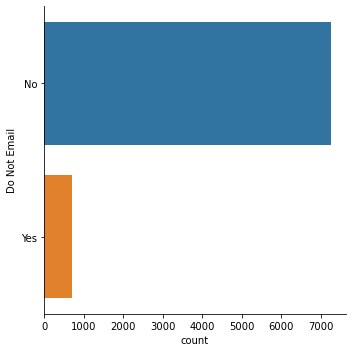

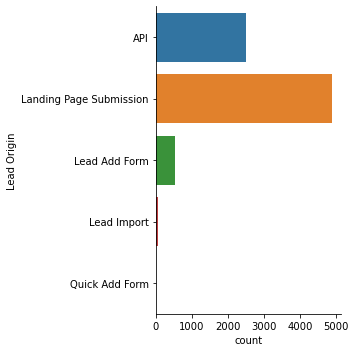

In [42]:
# Univariate Analysis of Numerical Columns
for c in categorical_column:
  cat_col_univariate_analysis(c)

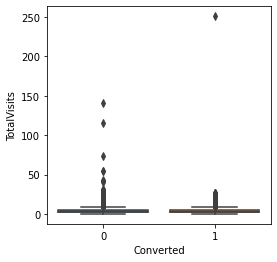

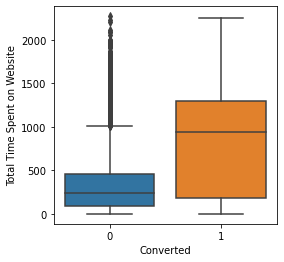

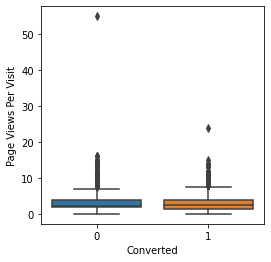

In [43]:
# Bivariate Analysis of Numerical Columns
for c in numerical_column:
  num_col_bivariate_analysis('Converted',c)

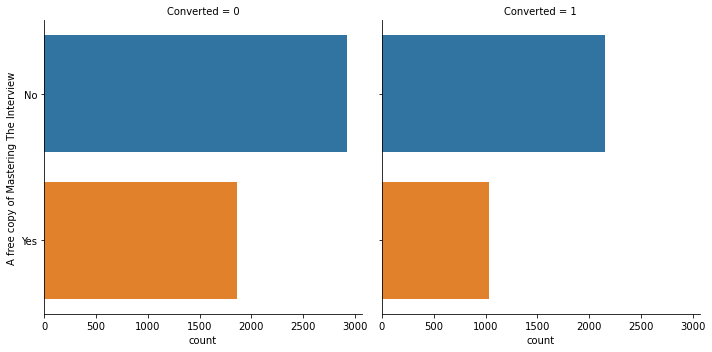

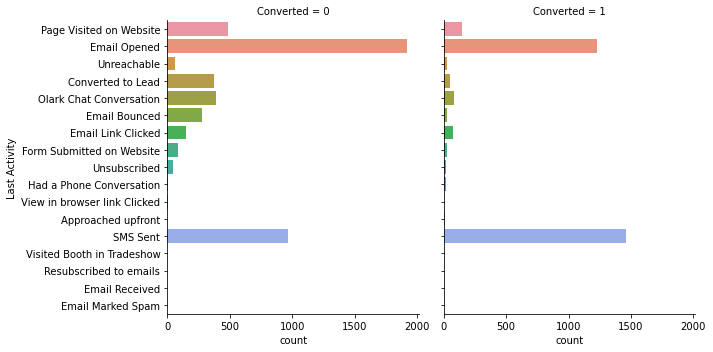

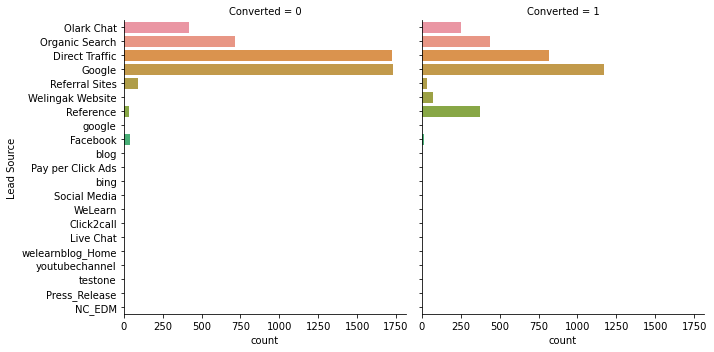

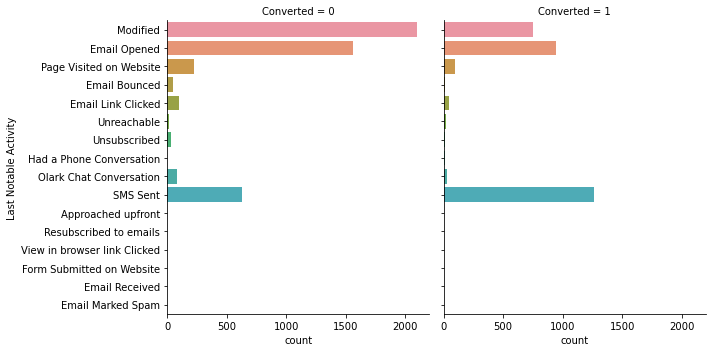

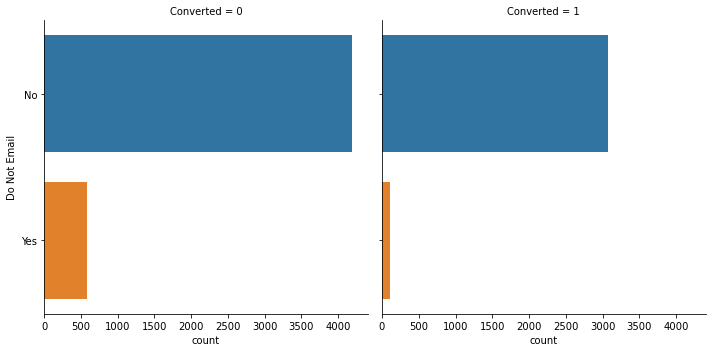

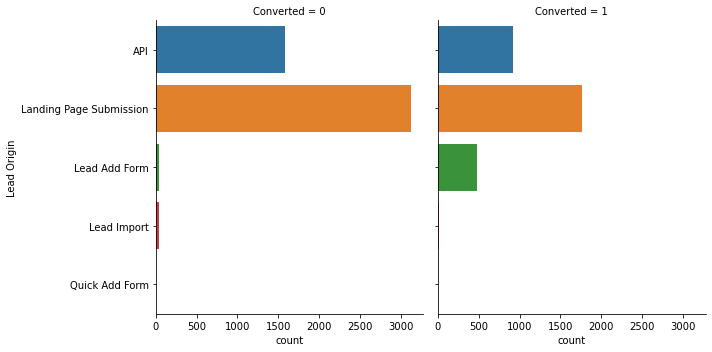

In [44]:

# Bivariate Analysis of Categorical Columns
for c in categorical_column:
  cat_col_bivariate_analysis('Converted',c)

<AxesSubplot:>

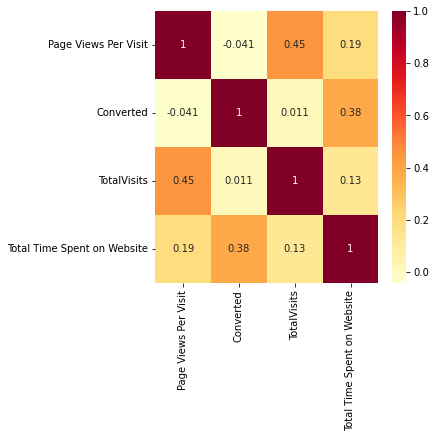

In [46]:
# Visualizing the correlation between all set of usable columns
plt.figure(figsize=(5, 5))
sns.heatmap(df_data.corr(), cmap="YlOrRd",annot=True)

In [47]:
# Summary: 

# Upon observing numerous plots above in EDA, we conclude the following points:

# Univariate Analysis Conclusion:

#There is low variation in Page Views Per Visit and TotalVisits but higher variation in Total Time Spent on Website
#There are a lot of outliers in Page Views Per Visit and TotalVisits which needs to be treated before modelling.

#Bivariate Analysis Conclusion:

#There is positive correlation between Total Time Spent on Website and Conversion
#There is come correlation between Conversion and some categorical columns like Lead Origin and Lead Source.

#Correlation Analysis (Heatmap) Conclusion:

#There is positive correlation between Total Time Spent on Website and Conversion
#There is almost no correlation in Page Views Per Visit and TotalVisits with Conversion

In [48]:
# CREATING DUMMY VARIABLES:
# Listing out columns for creating dummy variables
df_data[list(categorical_column)].describe()

,A free copy of Mastering The Interview,Last Activity,Lead Source,Last Notable Activity,Do Not Email,Lead Origin
count,7959,7959,7959,7959,7959,7959
unique,2,17,21,16,2,5
top,No,Email Opened,Google,Modified,No,Landing Page Submission
freq,5071,3146,2901,2847,7263,4886


In [49]:
# Creating dummy varaiables and drop_first to avoid multicollinearity
df_data = pd.get_dummies(data=df_data, columns=list(categorical_column), drop_first=True)
del categorical_column
df_data_usable_columns = set(df_data.columns)

In [50]:
# Overview of Dataframe (Shape, Datatype)
print(f'Shape of Data: {df_data.shape}', end="\n\n")
print('Information of Data')
print(f'{df_data.info()}', end="\n\n")
# Overview of Dataframe (Description, % of NaN) 
print('Description of Data')
print(f'{df_data.describe()}', end="\n\n")
print('Percentage of null values per column')
round(100*(df_data.isnull().sum()/len(df_data.index)),2)

Shape of Data: (7959, 61)

Information of Data
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7959 entries, 0 to 9239
Data columns (total 61 columns):
 #   Column                                              Dtype  
---  ------                                              -----  
 0   Page Views Per Visit                                float64
 1   Converted                                           int64  
 2   TotalVisits                                         float64
 3   Total Time Spent on Website                         int64  
 4   A free copy of Mastering The Interview_Yes          uint8  
 5   Last Activity_Converted to Lead                     uint8  
 6   Last Activity_Email Bounced                         uint8  
 7   Last Activity_Email Link Clicked                    uint8  
 8   Last Activity_Email Marked Spam                     uint8  
 9   Last Activity_Email Opened                          uint8  
 10  Last Activity_Email Received                        uint8  
 

Page Views Per Visit                          0.0
Converted                                     0.0
TotalVisits                                   0.0
Total Time Spent on Website                   0.0
A free copy of Mastering The Interview_Yes    0.0
                                             ... 
Do Not Email_Yes                              0.0
Lead Origin_Landing Page Submission           0.0
Lead Origin_Lead Add Form                     0.0
Lead Origin_Lead Import                       0.0
Lead Origin_Quick Add Form                    0.0
Length: 61, dtype: float64

In [51]:
def bivariate_analysis(c1,c2):
  sns.catplot(col=c1 ,y=c2, data=df_data, kind="count", height=2)
  plt.show()

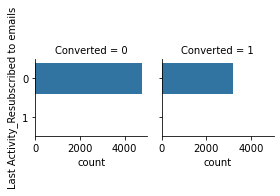

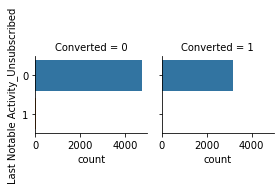

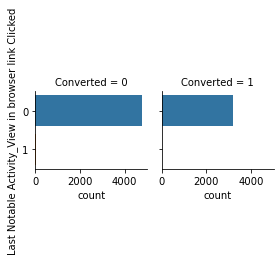

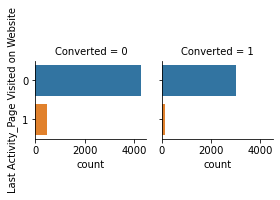

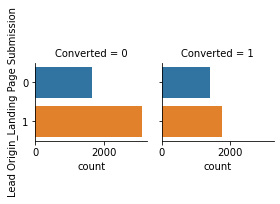

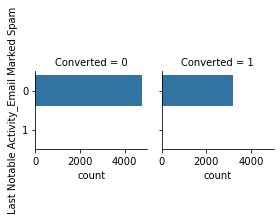

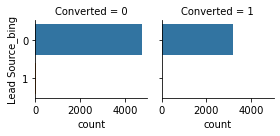

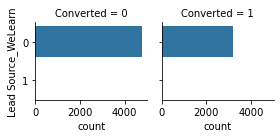

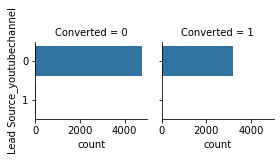

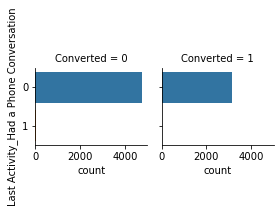

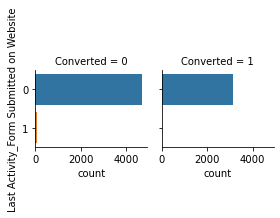

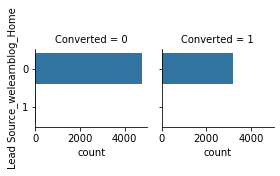

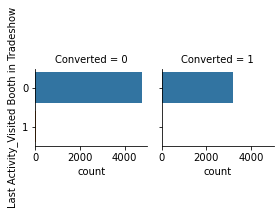

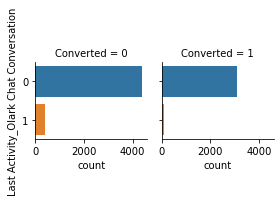

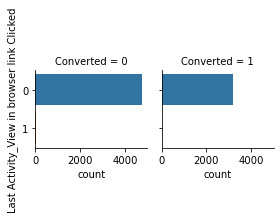

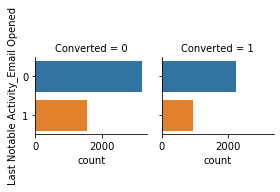

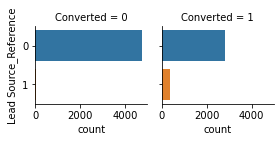

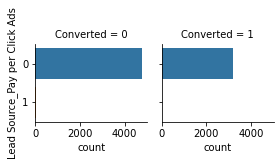

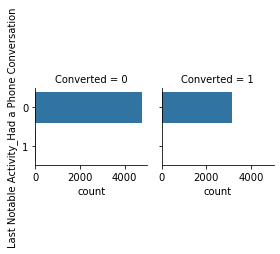

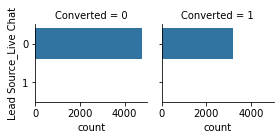

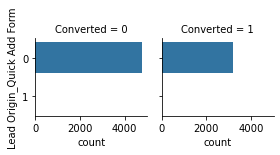

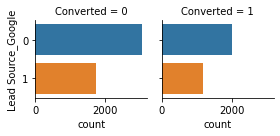

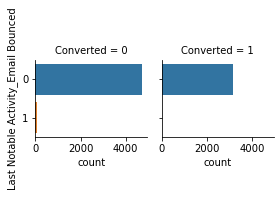

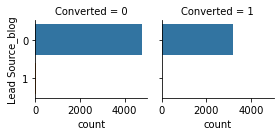

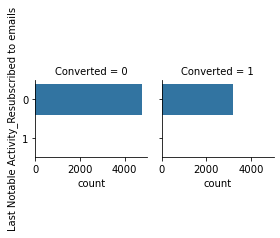

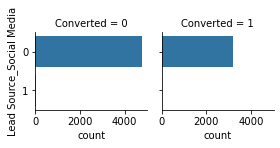

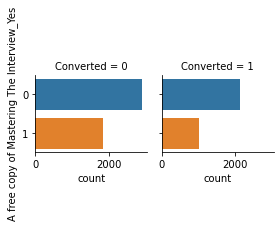

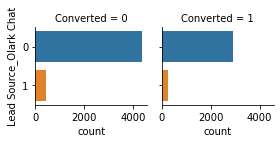

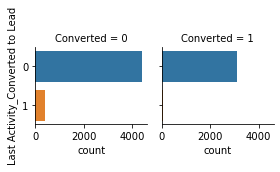

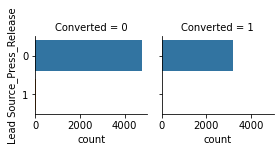

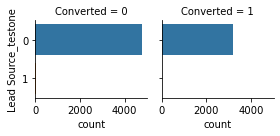

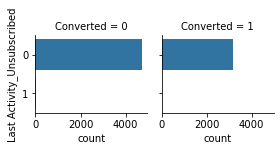

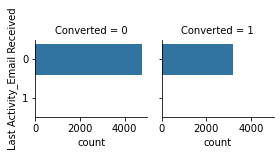

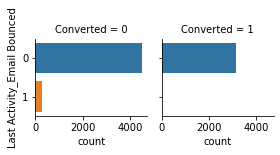

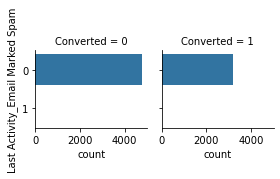

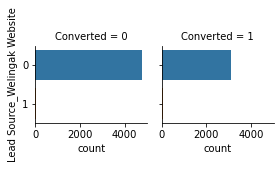

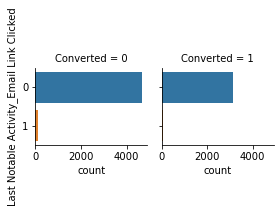

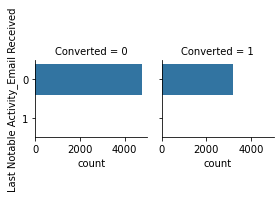

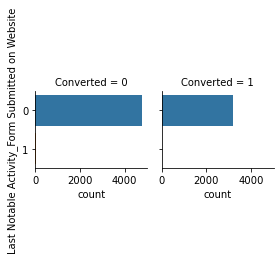

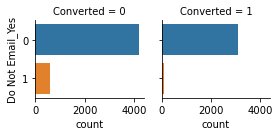

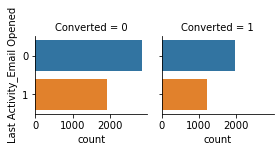

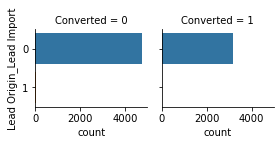

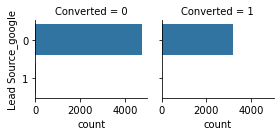

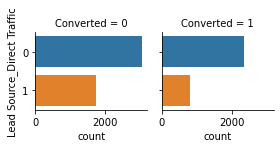

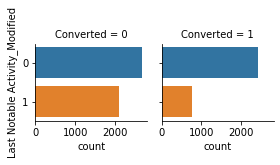

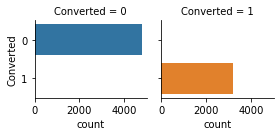

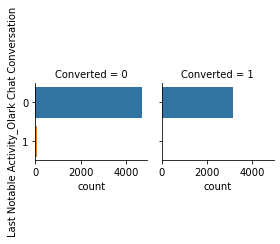

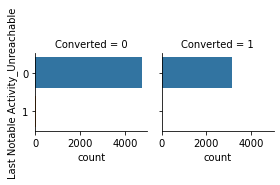

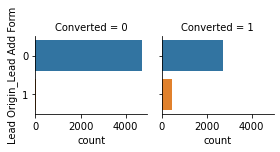

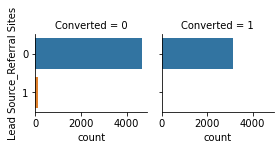

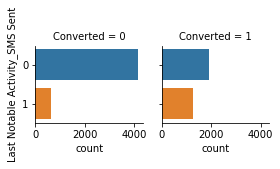

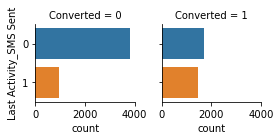

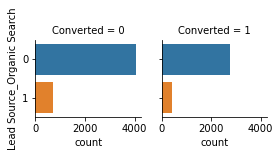

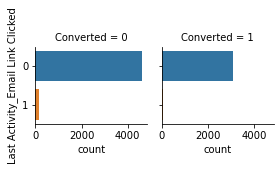

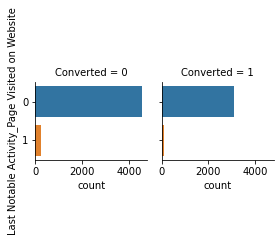

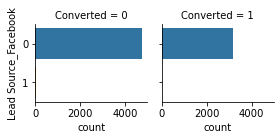

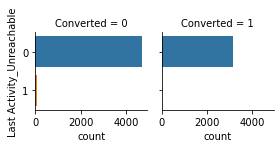

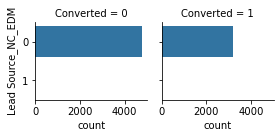

In [52]:
for c in df_data_usable_columns - numerical_column:
  bivariate_analysis('Converted',c)

<AxesSubplot:>

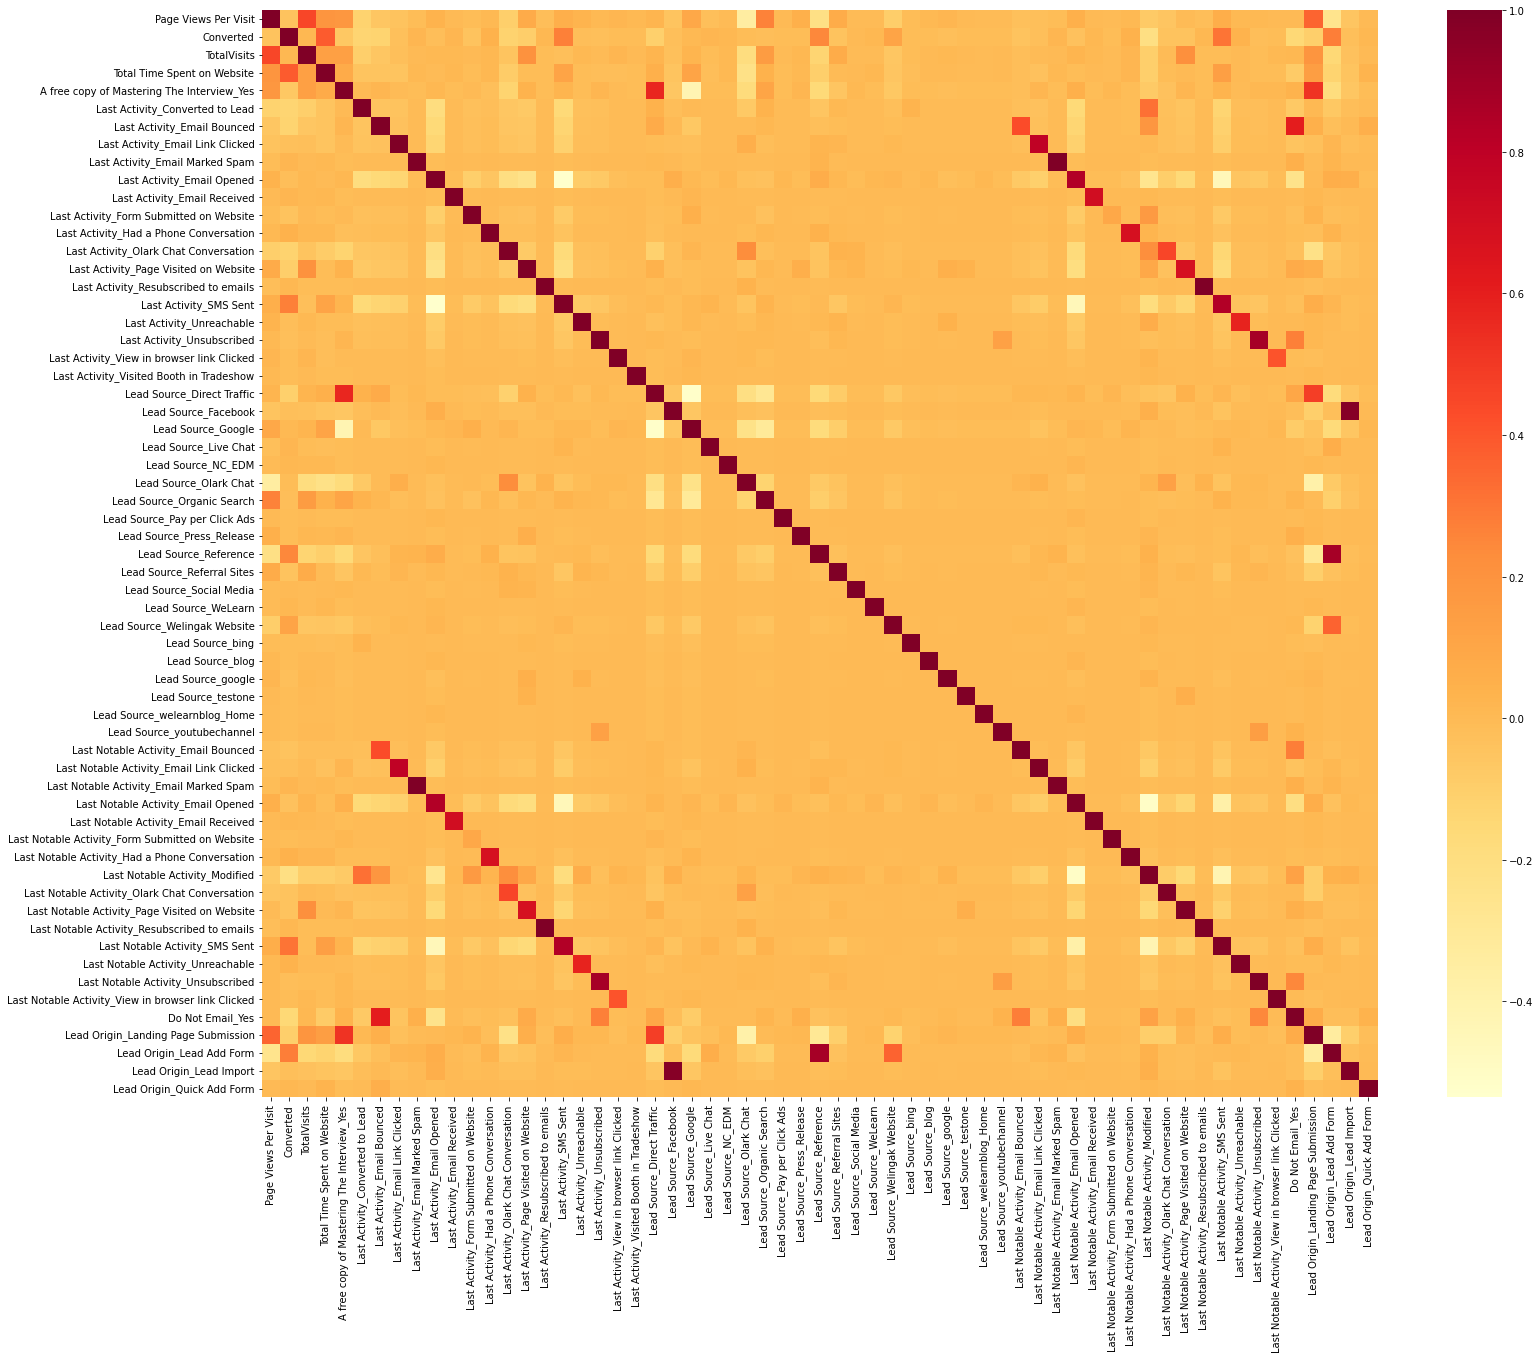

In [54]:
# Visualizing the correlation between all set of usable columns
plt.figure(figsize=(25, 20))
sns.heatmap(df_data.corr(), cmap="YlOrRd")

In [55]:
# SUMMARY:

# Upon observing numerous plots above in EDA , we conclude the following points:

# Bivariate Analysis Conclusion: The following dummy variables seems to have some effect on Conversion:

#Lead Origin_Lead Add Form
#Last Activity_Email Bounced
#Lead Source_Reference
#Total Time Spent on Website

#Correlation Analysis (Heatmap) Conclusion: The heatmap is not very clear due to huge number of columns, 
#however, we do see a lot of correlation amongst columns, especially dummy variables. 
# Hence we would further reduce the number of columns so as to reluce multicollinearity.

### OUTLIER:

In [57]:
# Removing outliers > +3 Std. Deviation or < -3 Std. Deviation 

# Checking if outliers exist
z = np.abs(stats.zscore(df_data))

# Outlier Records
df_data_outliers = df_data[(z > 3).any(axis=1)]

# Outlier Removed Records
df_data_non_outliers = df_data[(z < 3).all(axis=1)]
df_data_non_outliers.head()

,Page Views Per Visit,Converted,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Do Not Email_Yes,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form
1,2.5,0,5.0,674,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1,2.0,1532,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6,2.0,1,2.0,1640,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
8,2.0,0,2.0,71,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9,4.0,0,4.0,58,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### FEATURE NORMALIZATION:

In [58]:
# Normalising continuous features (numerical columns)
df = df_data_non_outliers[list(numerical_column)]
normalized_df=(df-df.mean())/df.std()
df_data_non_outliers.drop(columns=numerical_column,axis=1,inplace=True)
df_data_normal_non_outliers = pd.concat([df_data_non_outliers,normalized_df],axis=1)

print(f'Percentage of data retained: {100*(df_data_normal_non_outliers.shape[0]/df_data.shape[0]):.2}')
df_data_normal_non_outliers.head()
     

Percentage of data retained: 5.5e+01


,Converted,A free copy of Mastering The Interview_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Do Not Email_Yes,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,TotalVisits,Total Time Spent on Website,Page Views Per Visit
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.300713,-0.020867,-0.439954
2,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-0.927754,1.533098,-0.774894
6,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,-0.927754,1.728702,-0.774894
8,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-0.927754,-1.112990,-0.774894
9,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.108776,-1.136535,0.564868


## Splitting Data into Training and Test Sets

In [59]:
# Putting feature variable to X
X = df_data_normal_non_outliers.drop(['Converted'],axis=1)
# Putting response variable to y
y = df_data_normal_non_outliers['Converted']

y.head()

1    0
2    1
6    1
8    0
9    0
Name: Converted, dtype: int64

In [87]:

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3, random_state=10)

In [88]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,A free copy of Mastering The Interview_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Do Not Email_Yes,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,TotalVisits,Total Time Spent on Website,Page Views Per Visit
3743,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.285908,0.133333
4750,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0.0000,0.625283,0.133333
4688,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.3750,0.414137,0.222667
7892,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0625,0.025374,0.000000
5172,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.1875,0.039420,0.533333


### Model building: Feature Selection using RFE for Logistic Regression

In [89]:
# Running RFE with the output number of the variable equal to 25
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

rfe = RFE(logreg, step = 25)

rfe = rfe.fit(X_train, y_train)


In [90]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('A free copy of Mastering The Interview_Yes', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Marked Spam', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Email Received', True, 1),
 ('Last Activity_Form Submitted on Website', True, 1),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Last Activity_Resubscribed to emails', True, 1),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', False, 2),
 ('Last Activity_Unsubscribed', True, 1),
 ('Last Activity_View in browser link Clicked', True, 1),
 ('Last Activity_Visited Booth in Tradeshow', True, 1),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 2),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 2),
 ('Lead Source_NC

In [91]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

In [92]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [93]:
# Importing statsmodels
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3043
Model:                            GLM   Df Residuals:                     3030
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1515.9
Date:                Sat, 21 Jan 2023   Deviance:                       3031.8
Time:                        17:47:56   Pearson chi2:                 3.14e+03
No. Iterations:                    28   Pseudo R-squ. (CS):             0.3134
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                          8234.1101   5.03e+07      0.000      1.000   -9.86e+07    9.87e+07
A free copy of Mastering The Interview_Yes       -0.2519      0.128     -1.969      0.049      -0.503      -0.001
Last Activity_Converted to Lead               -2.005e-08      0.000     -0.000      1.000      -0.000       0.000
Last Activity_Email Bounced                    1.935e-08      0.000      0.000      1.000      -0.000       0.000
Last Activity_Email Link Clicked               2.876e-08      0.000      0.000      1.000      -0.000       0.000
Last Activity_Email Marked Spam                3.876e-09   2.37e-05      0.000      1.000   -4.65e-05    4.65e-05
Last Activity_Email Opened                      -21.1568   1.73e+04     -0.001      0.999   -3.39e+04    3.39e+04
Last Activity_Email Received                   8.452e-09   5.18e-05      0.000      1.000      -0.000       0.000
Last Activity_Form Submitted on Website        5.601e-10   3.46e-06      0.000      1.000   -6.78e-06    6.78e-06
Last Activity_Had a Phone Conversation        -1.832e-09   1.12e-05     -0.000      1.000   -2.19e-05    2.19e-05
Last Activity_Olark Chat Conversation         -3.401e-09   2.08e-05     -0.000      1.000   -4.07e-05    4.07e-05
Last Activity_Page Visited on Website          1.337e-07      0.001      0.000      1.000      -0.002       0.002
Last Activity_Resubscribed to emails          -5.893e-12   3.61e-08     -0.000      1.000   -7.07e-08    7.07e-08
Last Activity_SMS Sent                          -20.8082   1.73e+04     -0.001      0.999   -3.39e+04    3.39e+04
Last Activity_Unsubscribed                             0          0        nan        nan           0           0
Last Activity_View in browser link Clicked             0          0        nan        nan           0           0
Last Activity_Visited Booth in Tradeshow               0          0        nan        nan           0           0
Lead Source_Direct Traffic                     2744.6348   1.68e+07      0.000      1.000   -3.29e+07    3.29e+07
Lead Source_Google                             2744.8007   1.68e+07      0.000      1.000   -3.29e+07    3.29e+07
Lead Source_Organic Search                     2744.6746   1.68e+07      0.000      1.000   -3.29e+07    3.29e+07
Last Notable Activity_Email Opened            -1.096e+04   6.71e+07     -0.000      1.000   -1.32e+08    1.32e+08
Last Notable Activity_Modified                -1.096e+04   6.71e+07     -0.000      1.000   -1.32e+08    1.32e+08
Last Notable Activity_Page Visited on Website          0          0        nan        nan           0           0
Last Notable Activity_SMS Sent                -1.096e+04   6.71e+07     -0.000      1.000   -1.32e+08    1.32e+08
Do No

In [77]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,Lead Source_Google,1377.42
16,Lead Source_Direct Traffic,1175.32
19,Last Notable Activity_Email Opened,1143.08
23,Last Notable Activity_SMS Sent,1037.56
20,Last Notable Activity_Modified,662.00
18,Lead Source_Organic Search,504.05
5,Last Activity_Email Opened,377.28
12,Last Activity_SMS Sent,377.23
0,A free copy of Mastering The Interview_Yes,1.98
24,Lead Origin_Landing Page Submission,1.43


In [94]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3043
Model:                            GLM   Df Residuals:                     3030
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1515.9
Date:                Sat, 21 Jan 2023   Deviance:                       3031.8
Time:                        17:48:00   Pearson chi2:                 3.14e+03
No. Iterations:                    28   Pseudo R-squ. (CS):             0.3134
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                          8234.1101   5.03e+07      0.000      1.000   -9.86e+07    9.87e+07
A free copy of Mastering The Interview_Yes       -0.2519      0.128     -1.969      0.049      -0.503      -0.001
Last Activity_Converted to Lead               -2.005e-08      0.000     -0.000      1.000      -0.000       0.000
Last Activity_Email Bounced                    1.935e-08      0.000      0.000      1.000      -0.000       0.000
Last Activity_Email Link Clicked               2.876e-08      0.000      0.000      1.000      -0.000       0.000
Last Activity_Email Marked Spam                3.876e-09   2.37e-05      0.000      1.000   -4.65e-05    4.65e-05
Last Activity_Email Opened                      -21.1568   1.73e+04     -0.001      0.999   -3.39e+04    3.39e+04
Last Activity_Email Received                   8.452e-09   5.18e-05      0.000      1.000      -0.000       0.000
Last Activity_Form Submitted on Website        5.601e-10   3.46e-06      0.000      1.000   -6.78e-06    6.78e-06
Last Activity_Had a Phone Conversation        -1.832e-09   1.12e-05     -0.000      1.000   -2.19e-05    2.19e-05
Last Activity_Olark Chat Conversation         -3.401e-09   2.08e-05     -0.000      1.000   -4.07e-05    4.07e-05
Last Activity_Page Visited on Website          1.337e-07      0.001      0.000      1.000      -0.002       0.002
Last Activity_Resubscribed to emails          -5.893e-12   3.61e-08     -0.000      1.000   -7.07e-08    7.07e-08
Last Activity_SMS Sent                          -20.8082   1.73e+04     -0.001      0.999   -3.39e+04    3.39e+04
Last Activity_Unsubscribed                             0          0        nan        nan           0           0
Last Activity_View in browser link Clicked             0          0        nan        nan           0           0
Last Activity_Visited Booth in Tradeshow               0          0        nan        nan           0           0
Lead Source_Direct Traffic                     2744.6348   1.68e+07      0.000      1.000   -3.29e+07    3.29e+07
Lead Source_Google                             2744.8007   1.68e+07      0.000      1.000   -3.29e+07    3.29e+07
Lead Source_Organic Search                     2744.6746   1.68e+07      0.000      1.000   -3.29e+07    3.29e+07
Last Notable Activity_Email Opened            -1.096e+04   6.71e+07     -0.000      1.000   -1.32e+08    1.32e+08
Last Notable Activity_Modified                -1.096e+04   6.71e+07     -0.000      1.000   -1.32e+08    1.32e+08
Last Notable Activity_Page Visited on Website          0          0        nan        nan           0           0
Last Notable Activity_SMS Sent                -1.096e+04   6.71e+07     -0.000      1.000   -1.32e+08    1.32e+08
Do No

In [95]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,Lead Source_Google,1382.60
16,Lead Source_Direct Traffic,1179.25
19,Last Notable Activity_Email Opened,1143.08
22,Last Notable Activity_SMS Sent,1037.56
20,Last Notable Activity_Modified,662.00
18,Lead Source_Organic Search,506.24
5,Last Activity_Email Opened,377.28
12,Last Activity_SMS Sent,377.23
0,A free copy of Mastering The Interview_Yes,1.98
24,Lead Origin_Landing Page Submission,1.43


In [96]:
X_train.drop('Page Views Per Visit', axis = 1, inplace = True)

In [97]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3043
Model:                            GLM   Df Residuals:                     3031
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1522.3
Date:                Sat, 21 Jan 2023   Deviance:                       3044.7
Time:                        17:48:12   Pearson chi2:                 3.15e+03
No. Iterations:                    18   Pseudo R-squ. (CS):             0.3105
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            22.1750   5.93e+06   3.74e-06      1.000   -1.16e+07    1.16e+07
A free copy of Mastering The Interview_Yes       -0.2140      0.127     -1.683      0.092      -0.463       0.035
Last Activity_Converted to Lead               -4.419e-12   1.82e-06  -2.43e-06      1.000   -3.56e-06    3.56e-06
Last Activity_Email Bounced                    1.043e-11   1.73e-06   6.03e-06      1.000   -3.39e-06    3.39e-06
Last Activity_Email Link Clicked               1.991e-11   6.16e-06   3.23e-06      1.000   -1.21e-05    1.21e-05
Last Activity_Email Marked Spam                1.013e-11   2.41e-06    4.2e-06      1.000   -4.73e-06    4.73e-06
Last Activity_Email Opened                      -29.5706   1.23e+06  -2.41e-05      1.000   -2.41e+06    2.41e+06
Last Activity_Email Received                   1.235e-11    2.4e-06   5.14e-06      1.000   -4.71e-06    4.71e-06
Last Activity_Form Submitted on Website        6.607e-13   6.27e-08   1.05e-05      1.000   -1.23e-07    1.23e-07
Last Activity_Had a Phone Conversation        -2.088e-12   1.11e-06  -1.87e-06      1.000   -2.18e-06    2.18e-06
Last Activity_Olark Chat Conversation           6.76e-11   1.97e-05   3.42e-06      1.000   -3.87e-05    3.87e-05
Last Activity_Page Visited on Website          6.747e-15   1.73e-09   3.91e-06      1.000   -3.39e-09    3.39e-09
Last Activity_Resubscribed to emails                   0          0        nan        nan           0           0
Last Activity_SMS Sent                          -29.2261   1.23e+06  -2.38e-05      1.000   -2.41e+06    2.41e+06
Last Activity_Unsubscribed                             0          0        nan        nan           0           0
Last Activity_View in browser link Clicked             0          0        nan        nan           0           0
Last Activity_Visited Booth in Tradeshow               0          0        nan        nan           0           0
Lead Source_Direct Traffic                        7.3581   1.98e+06   3.72e-06      1.000   -3.88e+06    3.88e+06
Lead Source_Google                                7.5041   1.98e+06    3.8e-06      1.000   -3.88e+06    3.88e+06
Lead Source_Organic Search                        7.3127   1.98e+06    3.7e-06      1.000   -3.88e+06    3.88e+06
Last Notable Activity_Email Opened               -2.3324      8e+06  -2.91e-07      1.000   -1.57e+07    1.57e+07
Last Notable Activity_Modified                   -2.5660      8e+06  -3.21e-07      1.000   -1.57e+07    1.57e+07
Last Notable Activity_Page Visited on Website          0          0        nan        nan           0           0
Last Notable Activity_SMS Sent                   -1.1751      8e+06  -1.47e-07      1.000   -1.57e+07    1.57e+07
Do No

In [98]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,Lead Source_Google,1379.97
16,Lead Source_Direct Traffic,1177.26
19,Last Notable Activity_Email Opened,1142.87
22,Last Notable Activity_SMS Sent,1037.42
20,Last Notable Activity_Modified,661.89
18,Lead Source_Organic Search,504.94
5,Last Activity_Email Opened,377.18
12,Last Activity_SMS Sent,377.12
0,A free copy of Mastering The Interview_Yes,1.97
24,Lead Origin_Landing Page Submission,1.35


### All the VIF values are good and all the p-values are below 0.05. So we can fix model.

### Predicting:

In [99]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3743    0.250521
4750    0.882502
4688    0.455032
7892    0.376083
5172    0.136530
6819    0.931783
2685    0.958752
3135    0.120608
3329    0.889642
7508    0.197005
dtype: float64

In [100]:
# Converting to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.2505207 , 0.88250181, 0.45503171, 0.37608262, 0.13653048,
       0.93178305, 0.95875206, 0.12060841, 0.88964189, 0.19700526])

In [101]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.250521
1,1,0.882502
2,1,0.455032
3,0,0.376083
4,0,0.136530


In [102]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.250521,0
1,1,0.882502,1
2,1,0.455032,0
3,0,0.376083,0
4,0,0.136530,0


### MODEL EVALUATION:

In [103]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1389,  312],
       [ 410,  932]], dtype=int64)

In [104]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7627341439369044

### That's around 76% accuracy which is good value

In [106]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [107]:
# Calculating the sensitivity
TP/(TP+FN)

0.6944858420268256

In [108]:
# Calculating the specificity
TN/(TN+FP)

0.8165784832451499

### With the current cut off as 0.5 we have around 76% accuracy, sensitivity of around 70% and specificity of around 82%

## Optimise Cut off (ROC Curve)

In [110]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [111]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

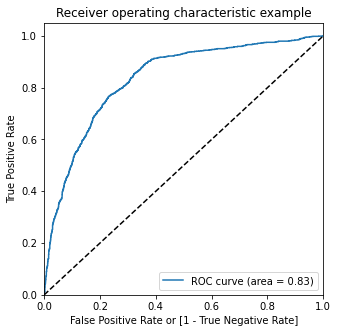

In [112]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

### The area under ROC curve is 0.83 which is a very good value

In [114]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.250521,0,1,1,1,0,0,0,0,0,0,0
1,1,0.882502,1,1,1,1,1,1,1,1,1,1,0
2,1,0.455032,0,1,1,1,1,1,0,0,0,0,0
3,0,0.376083,0,1,1,1,1,0,0,0,0,0,0
4,0,0.136530,0,1,1,0,0,0,0,0,0,0,0


In [115]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.441012,1.000000,0.000000
0.1,0.1,0.504436,0.979881,0.129336
0.2,0.2,0.701610,0.925484,0.524985
0.3,0.3,0.749589,0.888227,0.640212
0.4,0.4,0.758133,0.794337,0.729571
0.5,0.5,0.762734,0.694486,0.816578
0.6,0.6,0.740716,0.575261,0.871252
0.7,0.7,0.714427,0.457526,0.917108
0.8,0.8,0.674335,0.318182,0.955320
0.9,0.9,0.611896,0.139344,0.984715


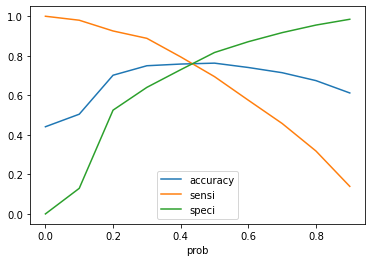

In [116]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### From the graph it is visible that the optimal cut off is at 0.42.

In [117]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.250521,0,1,1,1,0,0,0,0,0,0,0,0
1,1,0.882502,1,1,1,1,1,1,1,1,1,1,0,1
2,1,0.455032,0,1,1,1,1,1,0,0,0,0,0,1
3,0,0.376083,0,1,1,1,1,0,0,0,0,0,0,1
4,0,0.136530,0,1,1,0,0,0,0,0,0,0,0,0


In [118]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7522182057180414

In [119]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1160,  541],
       [ 213, 1129]], dtype=int64)

In [120]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [121]:
# Calculating the sensitivity
TP/(TP+FN)

0.8412816691505216

In [122]:
# Calculating the specificity
TN/(TN+FP)

0.6819517930629042

### With the current cut off as 0.42 we have accuracy of 76 %, sensitivity at 84% and specificity of around 68%

## Prediction on Test set

In [124]:
#Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [125]:
col = X_train.columns

In [126]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,A free copy of Mastering The Interview_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Do Not Email_Yes,Lead Origin_Landing Page Submission,Lead Origin_Lead Import,Lead Origin_Quick Add Form,TotalVisits,Total Time Spent on Website
2180,1.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0.0625,0.082465
4577,1.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0.1875,0.461713
1868,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0.1250,0.160852
3445,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0.0000,0.113729
4990,1.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0.0000,0.058450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0.2500,0.147712
1991,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0.5000,0.674671
3567,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0.1875,0.048935
2803,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0.1250,0.110557


In [127]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.111200
1,1,0.779536
2,0,0.204055
3,1,0.431980
4,1,0.289662


In [128]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.111200,0
1,1,0.779536,1
2,0,0.204055,0
3,1,0.431980,1
4,1,0.289662,0
...,...,...,...
1300,0,0.205156,0
1301,1,0.865302,1
1302,0,0.101685,0
1303,1,0.167891,0


In [129]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7448275862068966

In [130]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[488, 212],
       [121, 484]], dtype=int64)

In [131]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [132]:
# Calculating the sensitivity
TP/(TP+FN)

0.8

In [133]:
# Calculating the specificity
TN/(TN+FP)

0.6971428571428572

### With the current cut off as 0.35 we have accuracy of 75 %, sensitivity at 80% and specificity of around 69%

## Precision-Recall

In [135]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1389,  312],
       [ 410,  932]], dtype=int64)

In [136]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7491961414790996

In [137]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6944858420268256

### With the current cut off as 0.35 we have Precision around 75% and Recall around 70%

## Precision and recall tradeoff

In [139]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       1
 2       1
 3       0
 4       0
        ..
 3038    0
 3039    0
 3040    1
 3041    0
 3042    0
 Name: Converted, Length: 3043, dtype: int64,
 0       0
 1       1
 2       0
 3       0
 4       0
        ..
 3038    0
 3039    0
 3040    1
 3041    0
 3042    0
 Name: Predicted, Length: 3043, dtype: int64)

In [140]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

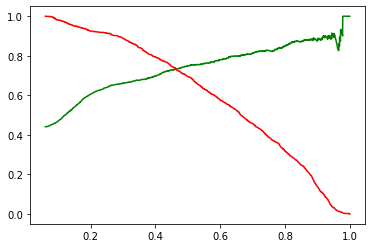

In [141]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [142]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.250521,0,1,1,1,0,0,0,0,0,0,0,0
1,1,0.882502,1,1,1,1,1,1,1,1,1,1,0,1
2,1,0.455032,0,1,1,1,1,1,0,0,0,0,0,1
3,0,0.376083,0,1,1,1,1,0,0,0,0,0,0,0
4,0,0.136530,0,1,1,0,0,0,0,0,0,0,0,0


In [143]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7594479132435097

In [144]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1256,  445],
       [ 287, 1055]], dtype=int64)

In [145]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [146]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7033333333333334

In [147]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.786140089418778

### With the current cut off as 0.45 we have Precision around 70% and Recall around 78% and accuracy 76 %.

## Prediction on Test set

In [148]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.111200
1,1,0.779536
2,0,0.204055
3,1,0.431980
4,1,0.289662


In [149]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.111200,0
1,1,0.779536,1
2,0,0.204055,0
3,1,0.431980,0
4,1,0.289662,0
...,...,...,...
1300,0,0.205156,0
1301,1,0.865302,1
1302,0,0.101685,0
1303,1,0.167891,0


### Checking the overall accuracy

In [150]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7494252873563219

In [151]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[542, 158],
       [169, 436]], dtype=int64)

In [152]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [153]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.734006734006734

In [154]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7206611570247934

### With the current cut off as 0.41 we have Precision around 73% , Recall around 72% and accuracy 75%.

### The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model

## CONCLUSION:

### It was found that the variables that mattered the most in the potential buyers are (In descending order) :

#### TotalVisits
#### The total time spend on the Website.
#### Lead Origin_Lead Add Form
#### Lead Source_Direct Traffic
#### Lead Source_Google
#### Lead Source_Welingak Website
#### Lead Source_Organic Search
#### Lead Source_Referral Sites
#### Lead Source_Welingak Website
#### Do Not Email_Yes
#### Last Activity_Email Bounced
#### Last Activity_Olark Chat Conversation

### Keeping these in mind the X Education can flourish as they have a very high chance to get almost all the potential buyers to change their mind and buy their courses.